In [1]:
## Mini project 1: House price Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("../data/maisons.csv")
df.head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,2 pans,individuelle,bonne,451.271415
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,2 pans,individuelle,moyenne,0.000000
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,2 pans,individuelle,bonne,466.368854
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,2 pans,individuelle,bonne,152.302986
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,2 pans,individuelle,bonne,378.184663


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surf_hab            1364 non-null   int64  
 1   qualite_materiau    1364 non-null   int64  
 2   surface_sous_sol    1364 non-null   int64  
 3   qualite_globale     1364 non-null   int64  
 4   n_garage_voitures   1364 non-null   int64  
 5   n_toilettes         1364 non-null   int64  
 6   n_cheminees         1364 non-null   int64  
 7   n_pieces            1364 non-null   int64  
 8   n_cuisines          1364 non-null   int64  
 9   n_chambres_coucher  1364 non-null   int64  
 10  annee_vente         1364 non-null   int64  
 11  prix                1364 non-null   int64  
 12  type_toit           1364 non-null   object 
 13  type_batiment       1364 non-null   object 
 14  qualite_cuisine     1364 non-null   object 
 15  surface_jardin      1364 non-null   float64
dtypes: flo

In [5]:
print(df["qualite_cuisine"].unique())
cuisine_encoder = {"mediocre": 0, "moyenne": 1, "bonne": 2, "excellente": 3}
df["qualite_cuisine_encoded"] = df["qualite_cuisine"].map(cuisine_encoder)
df["qualite_cuisine_encoded"]

['bonne' 'moyenne' 'excellente' 'mediocre']


0       2
1       1
2       2
3       2
4       2
       ..
1359    1
1360    3
1361    3
1362    3
1363    3
Name: qualite_cuisine_encoded, Length: 1364, dtype: int64

In [6]:
print(df["type_batiment"].unique())
type_encoder = {"individuelle": 0, "individuelle reconvertie": 1, "duplex": 2, "bout de rangée": 3, "milieu de rangée": 4}
df["type_batiment_encoded"] = df["type_batiment"].map(type_encoder)
df["type_batiment_encoded"]

['individuelle' 'individuelle reconvertie' 'duplex' 'bout de rangée'
 'milieu de rangée']


0       0
1       0
2       0
3       0
4       0
       ..
1359    0
1360    0
1361    0
1362    0
1363    0
Name: type_batiment_encoded, Length: 1364, dtype: int64

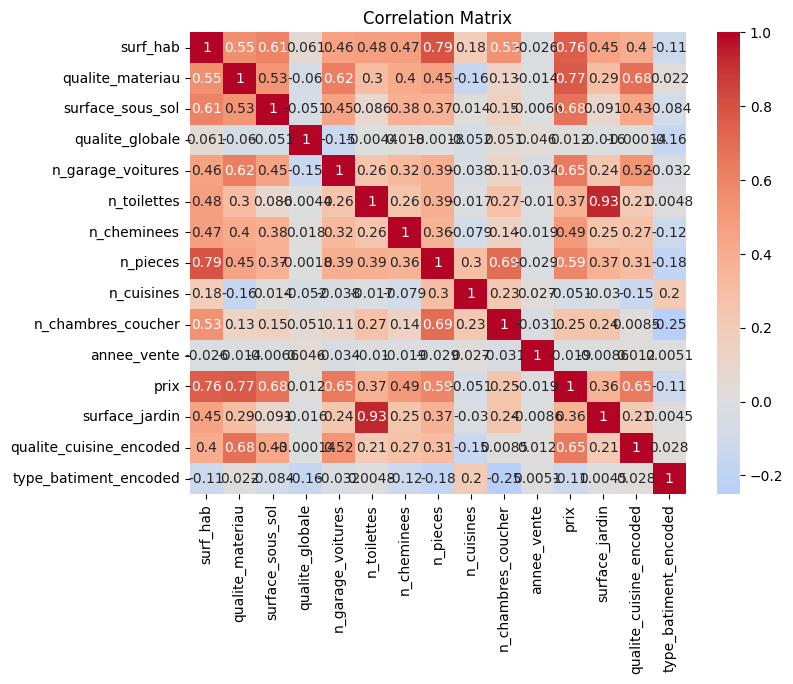

In [7]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

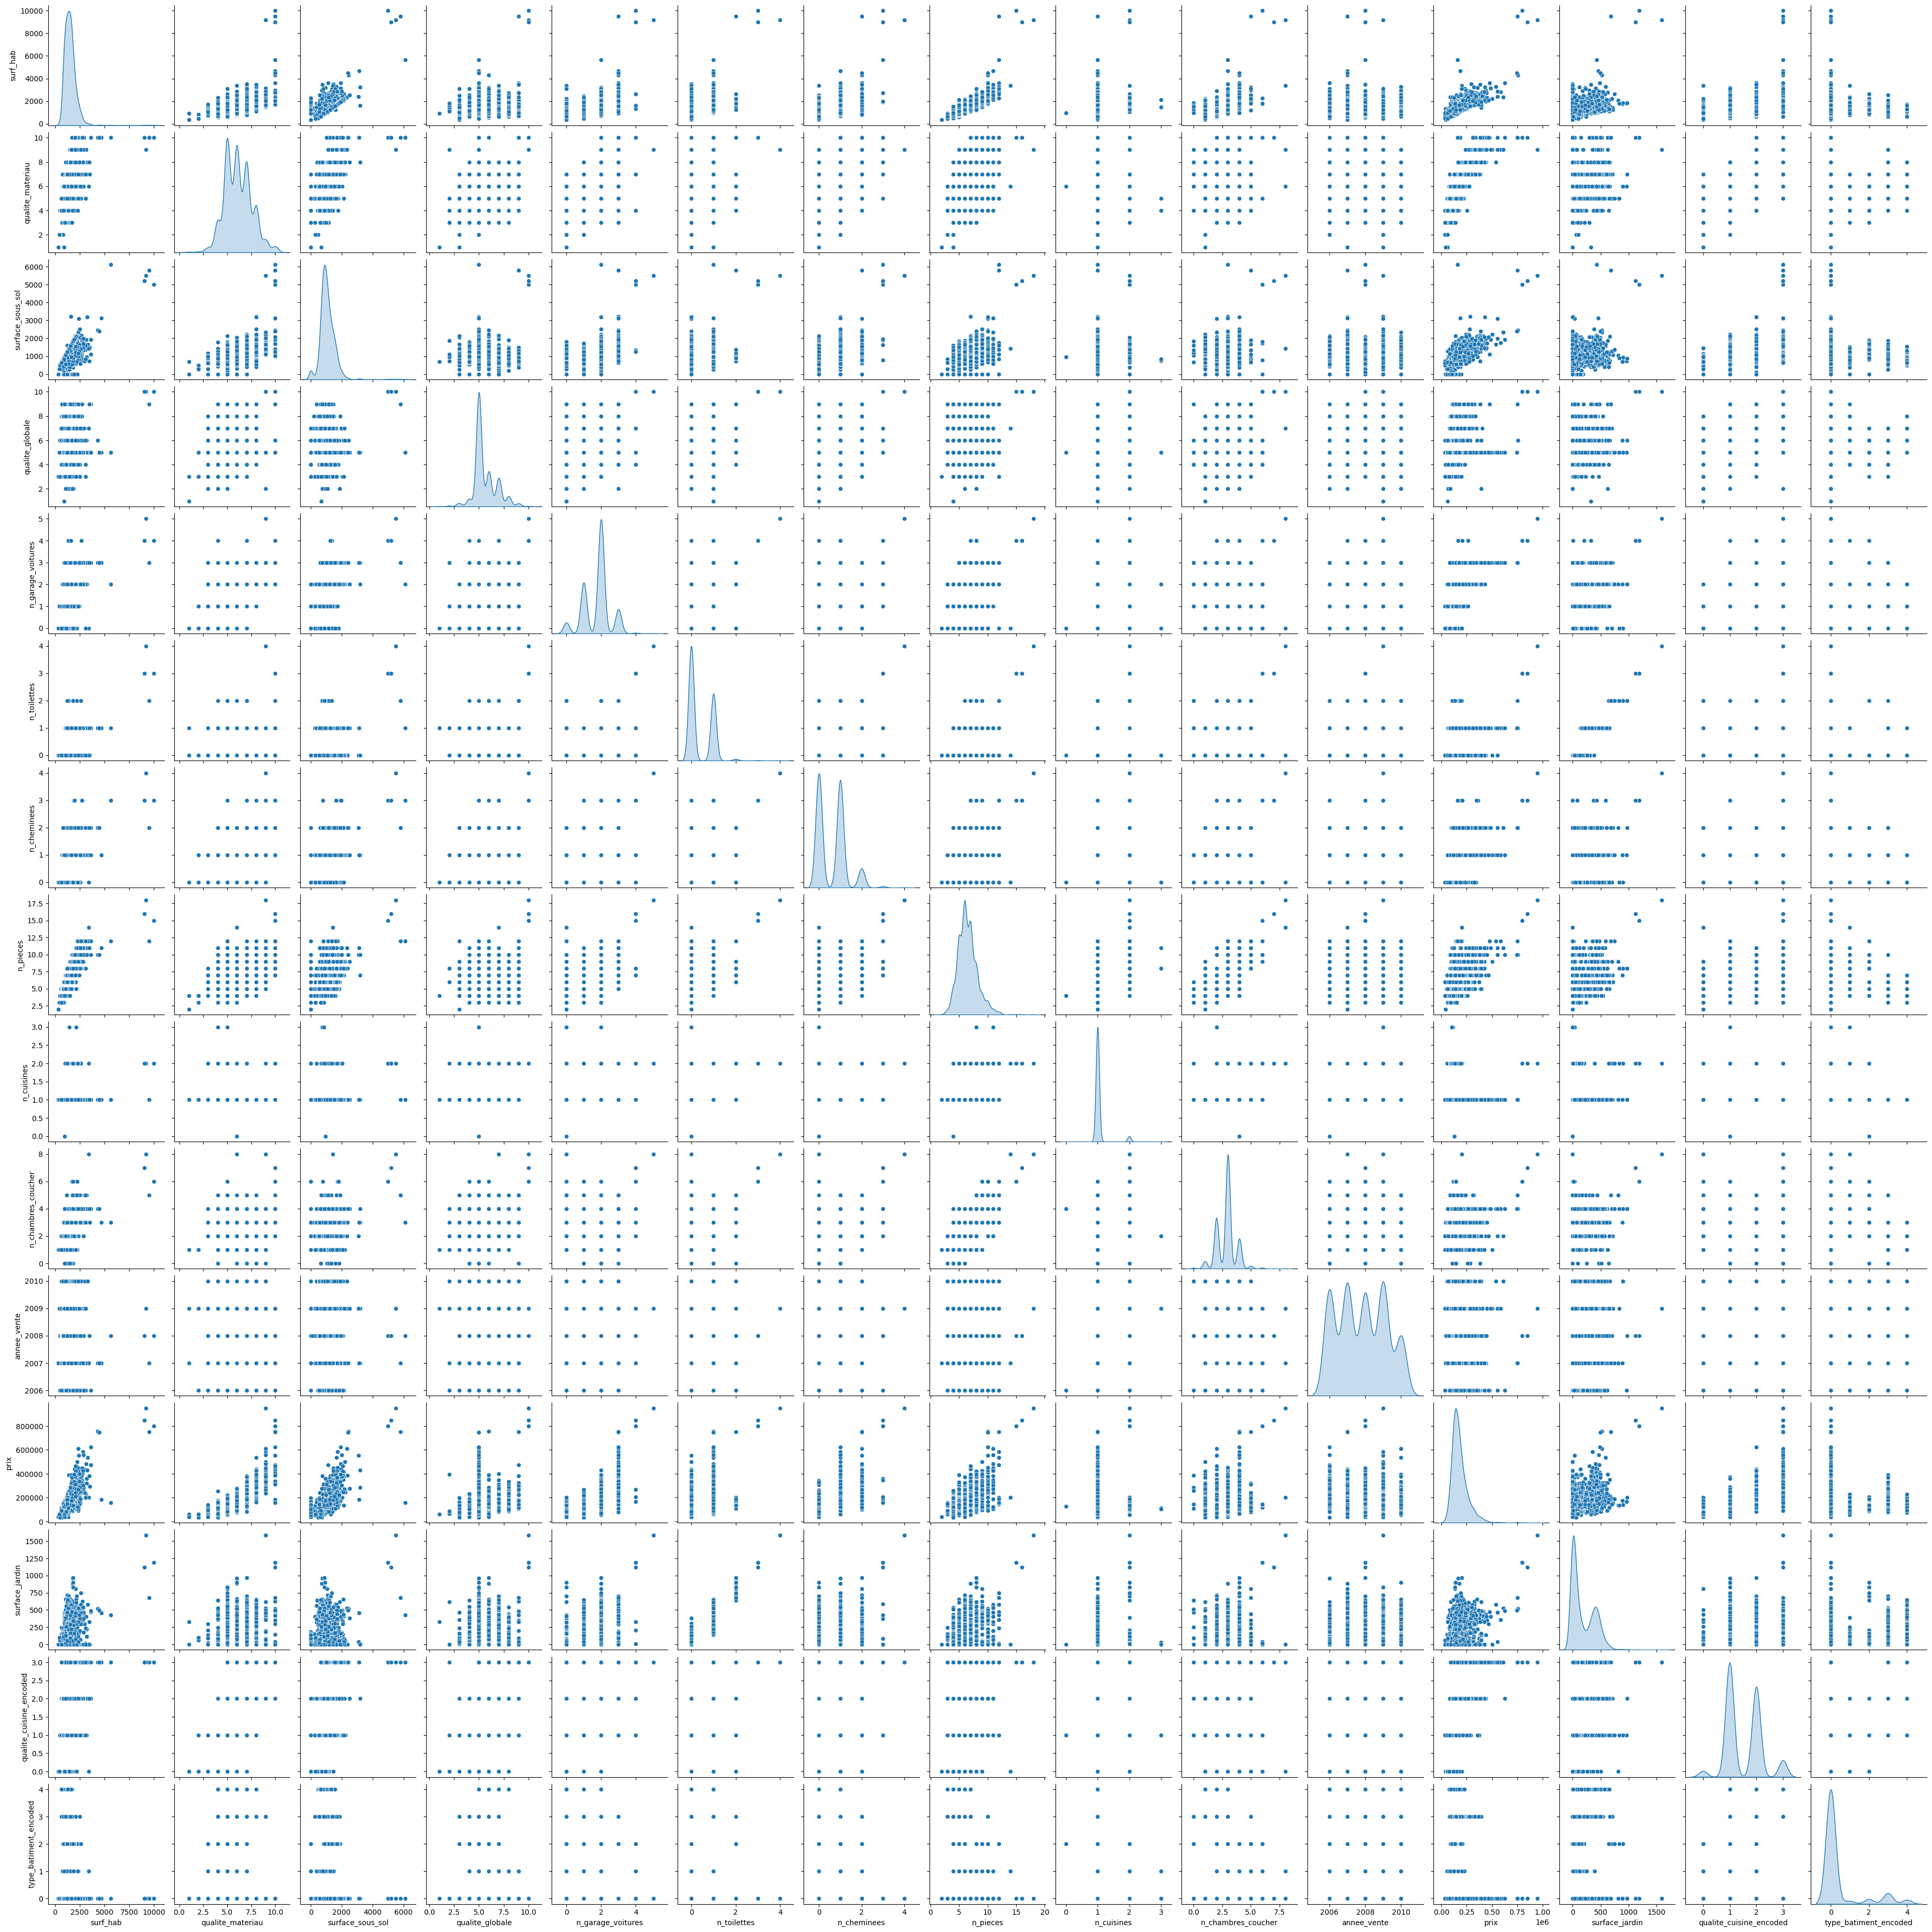

In [8]:
numeric_df = df.select_dtypes(include="number")

# Plot pairwise scatter plots
sns.pairplot(numeric_df, diag_kind="kde")  # diag_kind="hist" for histograms
plt.show()

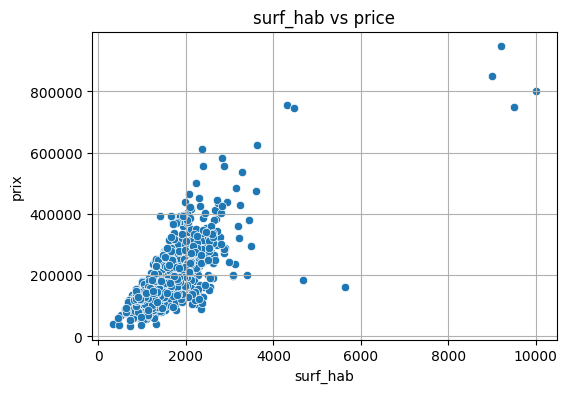

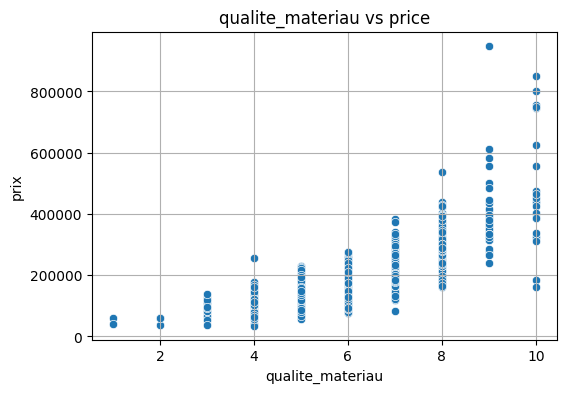

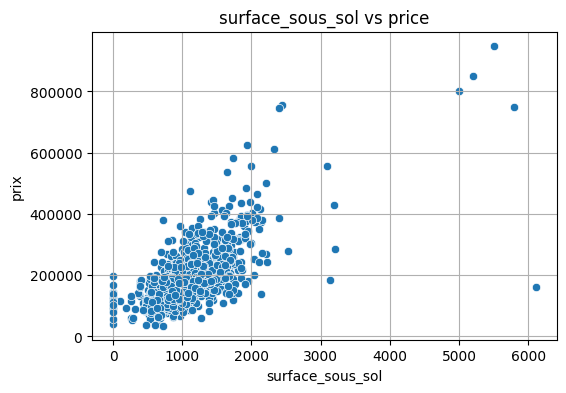

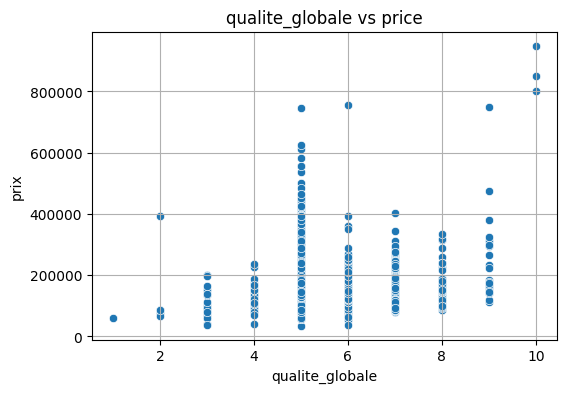

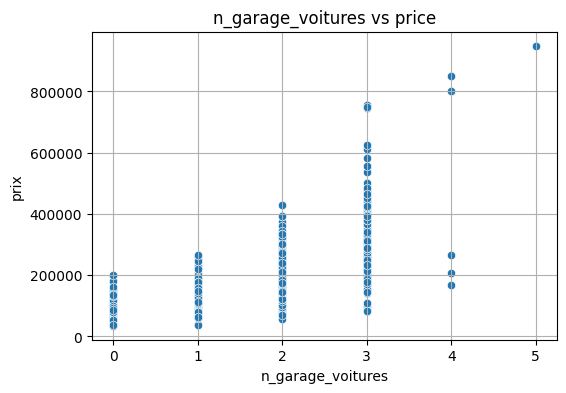

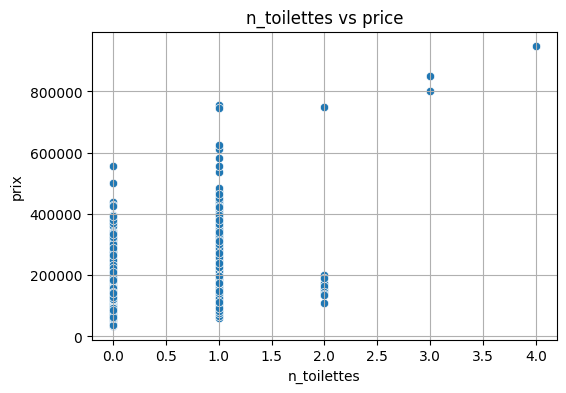

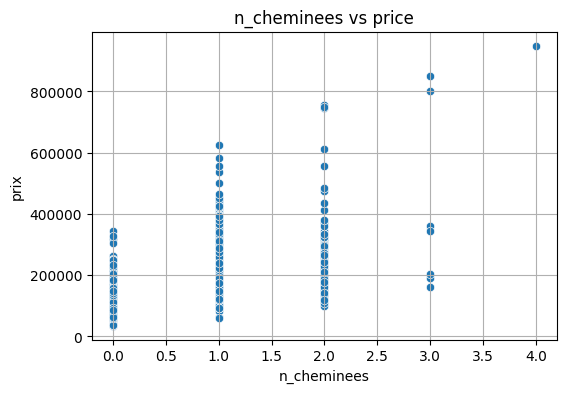

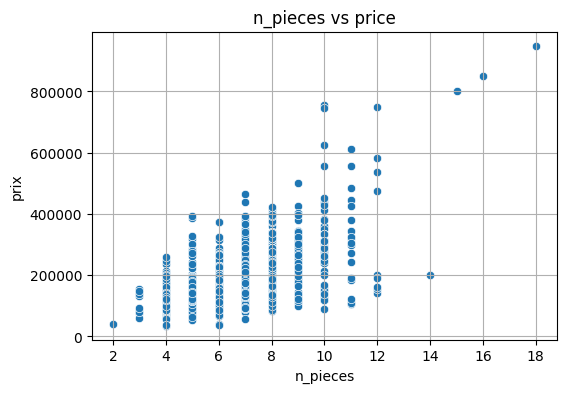

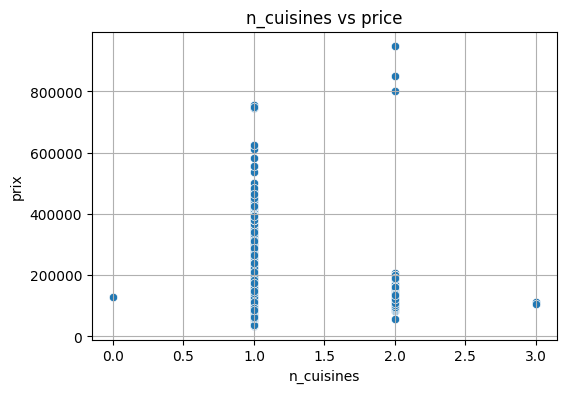

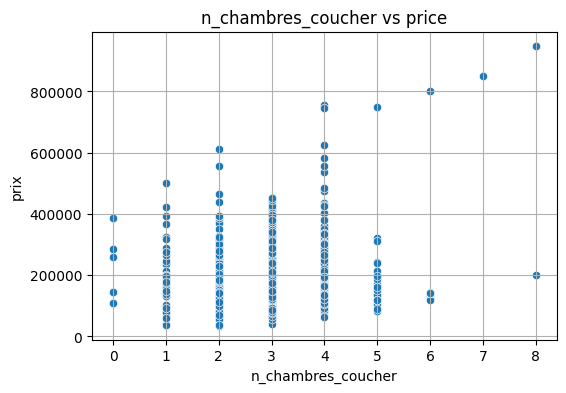

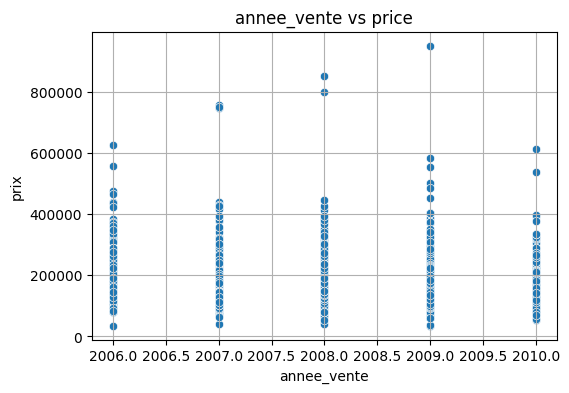

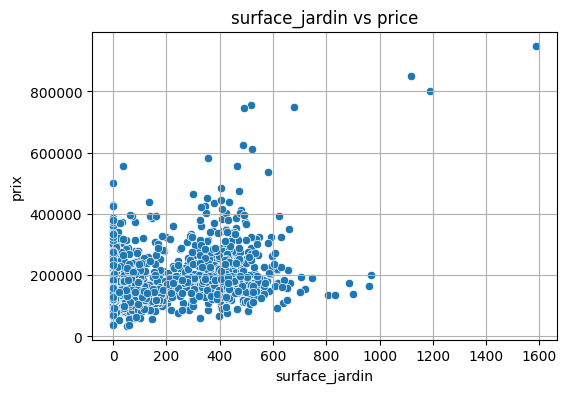

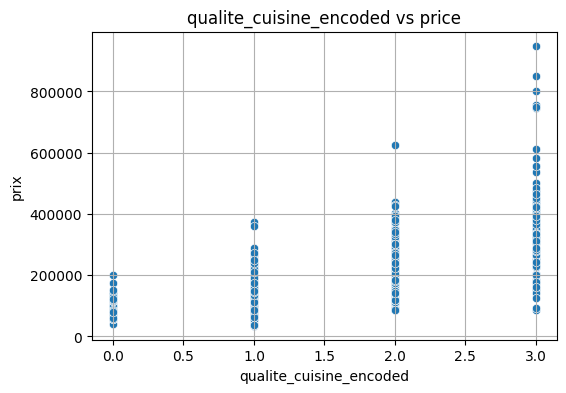

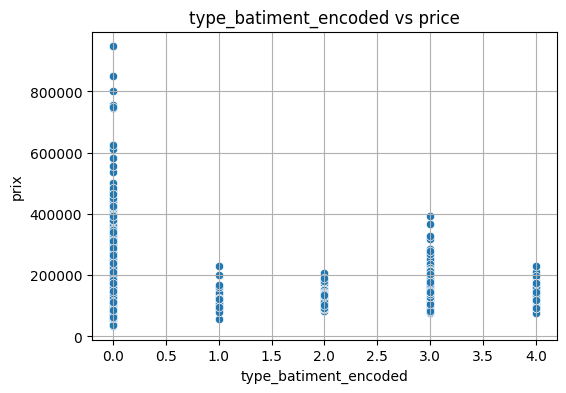

In [9]:
for col in numeric_df.drop(columns=["prix"]).columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(y="prix", x=col, data=df)
    plt.title(f"{col} vs price")
    plt.grid(True)
    plt.show()

In [10]:
df["surface_by_room"] = df["surf_hab"] / df["n_pieces"]

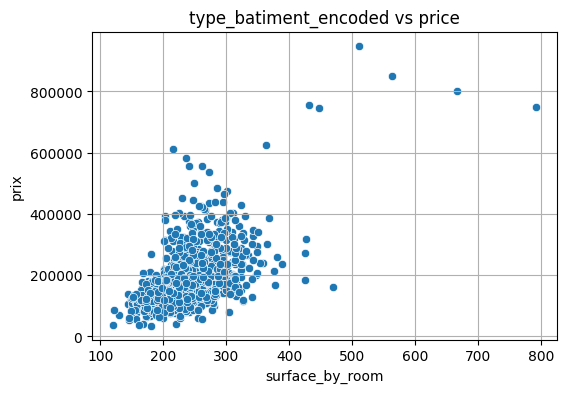

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(y="prix", x="surface_by_room", data=df)
plt.title(f"{col} vs price")
plt.grid(True)
plt.show()

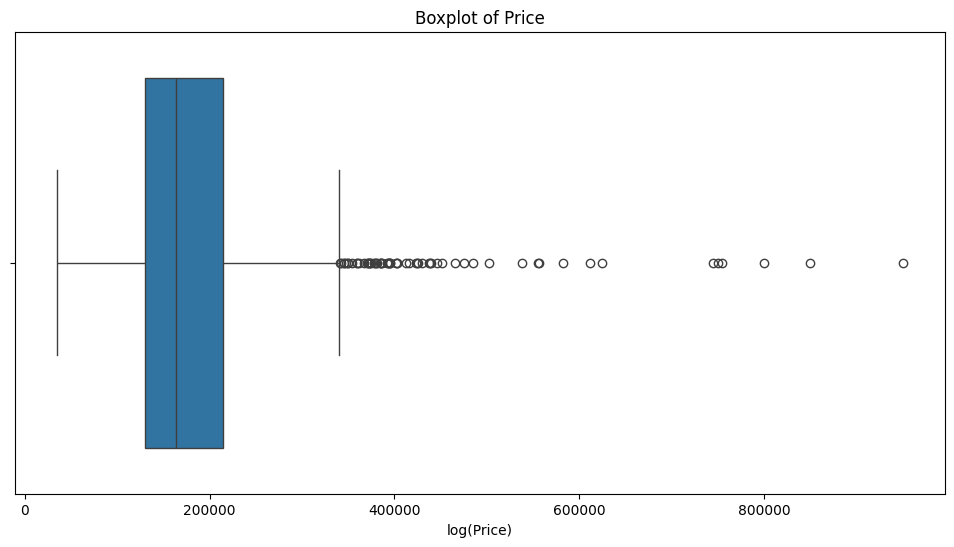

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x=(df["prix"]))
plt.title("Boxplot of Price")
plt.xlabel("log(Price)")
plt.show()

In [84]:

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)
# Now: 60% train, 20% val, 20% test

upper_bound=600000
# 4. Remove outliers from TRAINING set
train_df = train_df[ train_df["prix"] <= upper_bound]
val_df = val_df[val_df["prix"] <= upper_bound]


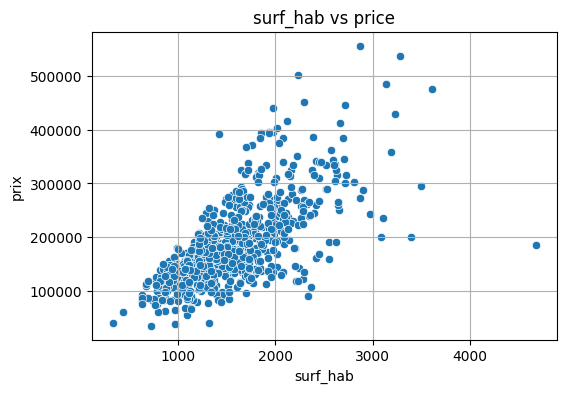

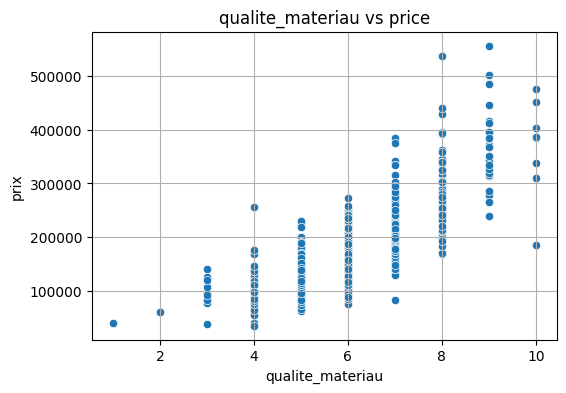

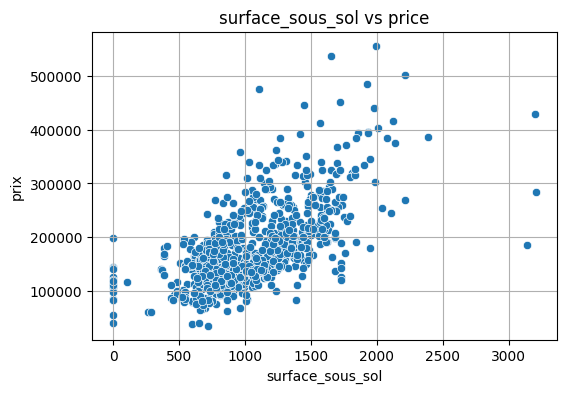

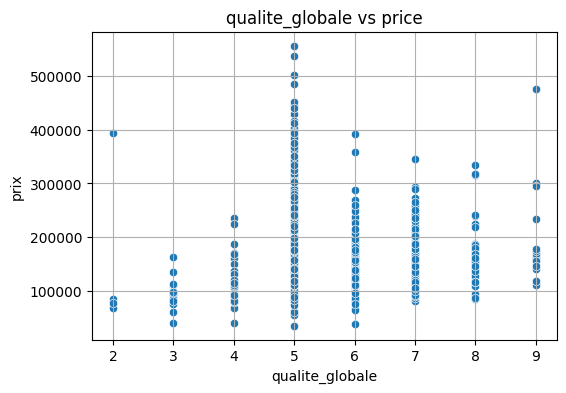

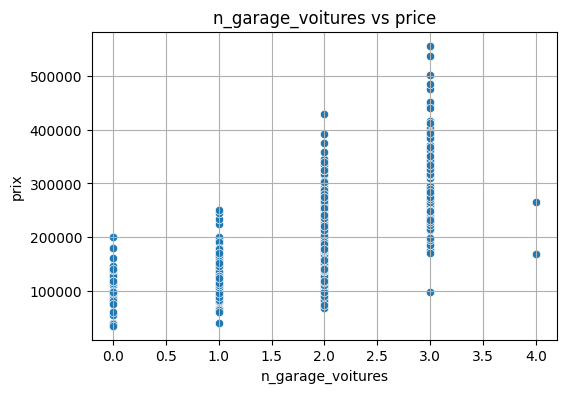

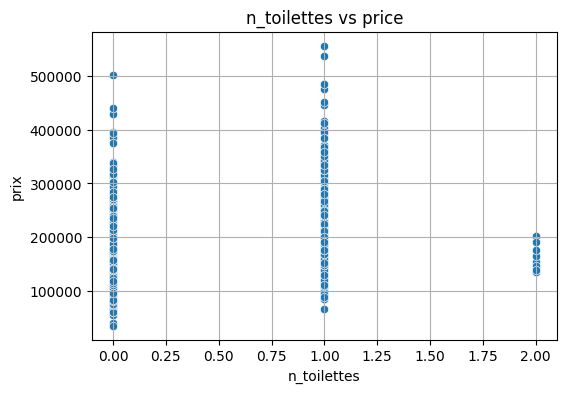

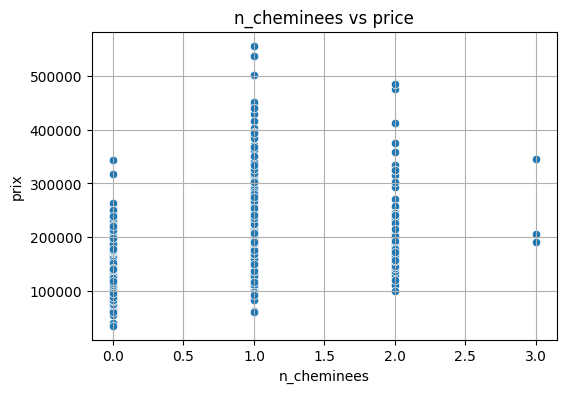

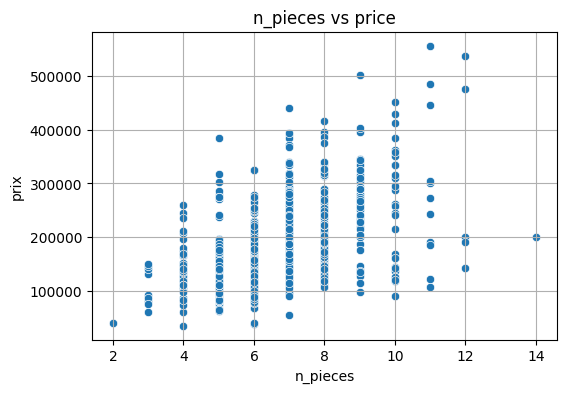

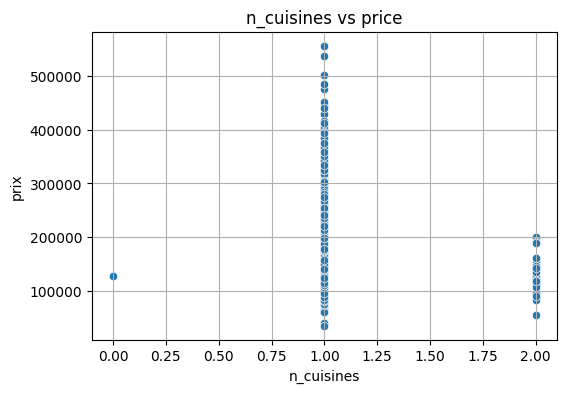

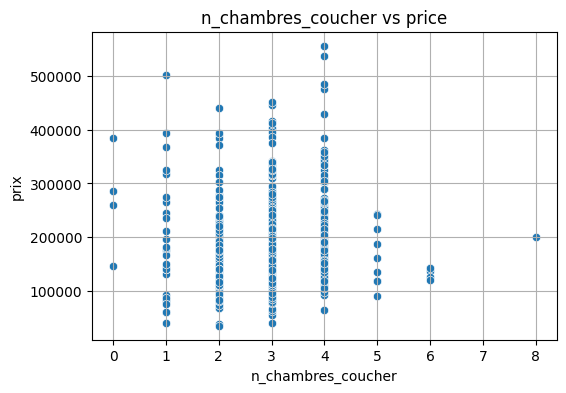

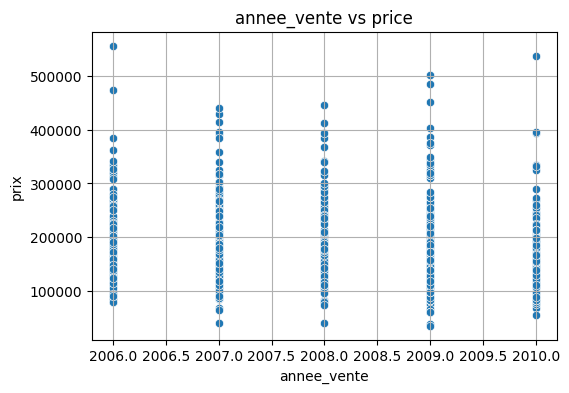

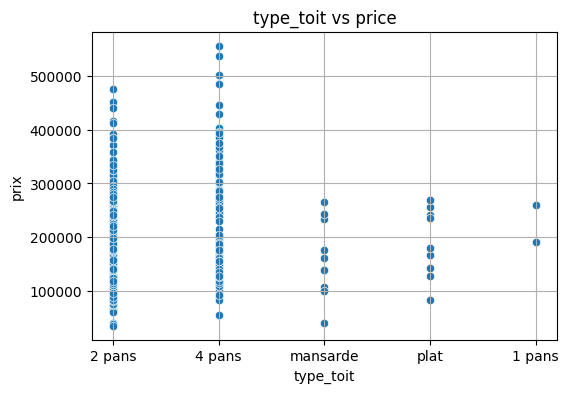

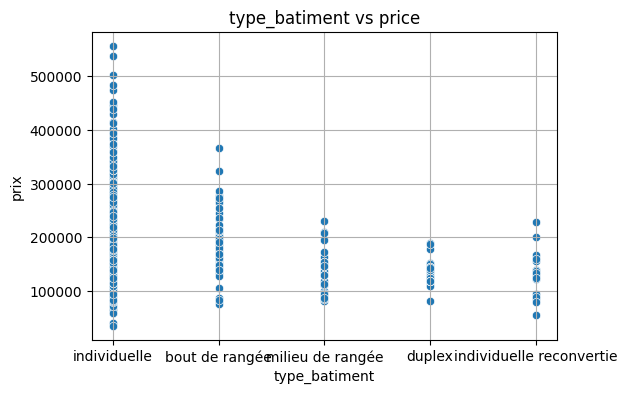

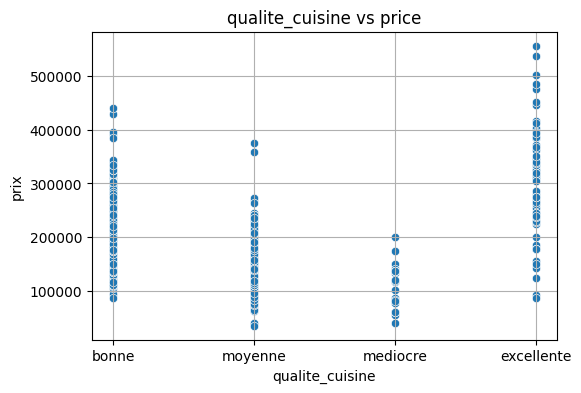

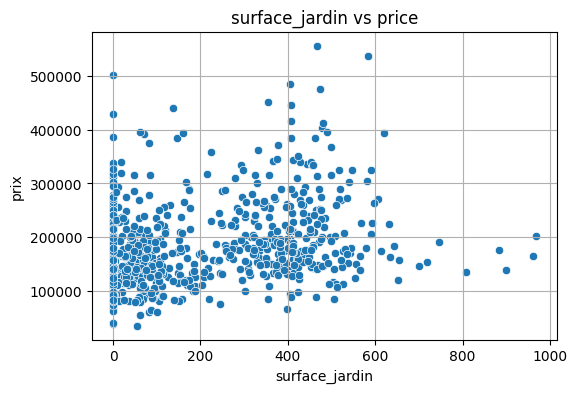

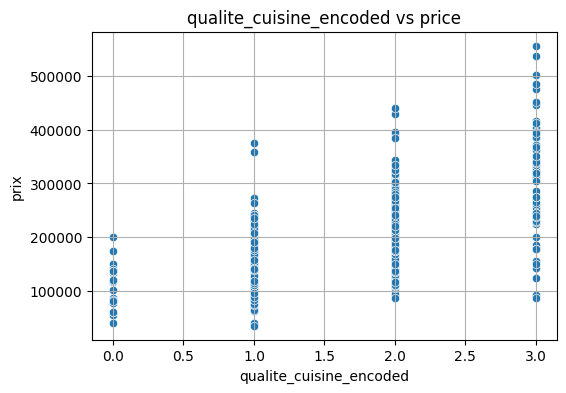

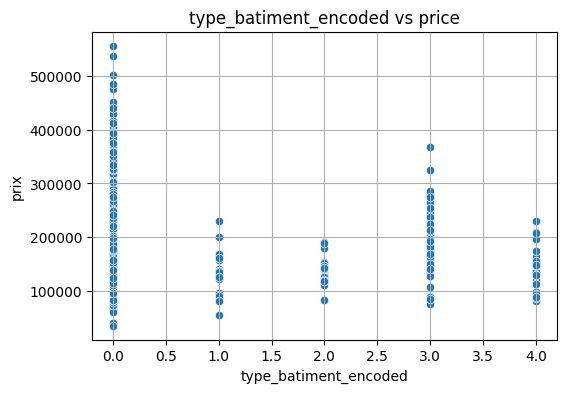

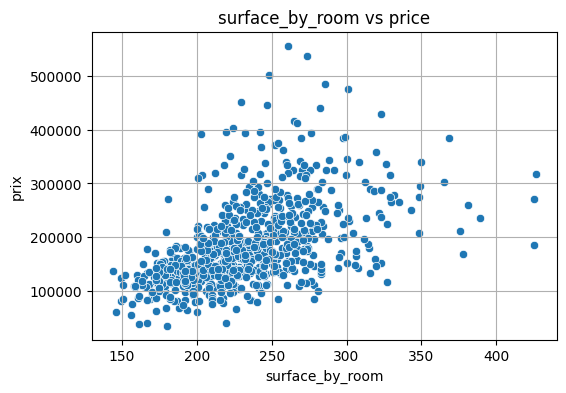

In [85]:
for col in train_df.drop(columns=["prix"]).columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(y="prix", x=col, data=train_df)
    plt.title(f"{col} vs price")
    plt.grid(True)
    plt.show()

In [86]:
selected_features = ["surface_by_room", "qualite_materiau", "surf_hab"]

X_train = train_df[selected_features]
y_train = train_df["prix"]

linear_regression = LinearRegression()
coef = linear_regression.fit(X_train, y_train)

In [94]:
for feat, coef in zip(selected_features, linear_regression.coef_):
    print(f"{feat}: {coef:.4f}")

surface_by_room: 50.8421
qualite_materiau: 32665.9383
surf_hab: 48.7393


In [88]:
# Predict price
y_train_pred= linear_regression.predict(X_train)

y_train_pred_price = (y_train_pred)
y_train_price = y_train   # true values back to original scale

# Compute metrics on price
mse_price = mean_squared_error(y_train_price, y_train_pred_price)
rmse_price = np.sqrt(mse_price)
mae_price = mean_absolute_error(y_train_price, y_train_pred_price)
r2_price = r2_score(y_train_price, y_train_pred_price)

print("Train MSE (price):", mse_price)
print("Train RMSE (price):", rmse_price)
print("Train MAE (price):", mae_price)
print("Train R^2 (price):", r2_price)


Train MSE (price): 1522037688.5368567
Train RMSE (price): 39013.30143088196
Train MAE (price): 27443.56499204835
Train R^2 (price): 0.7254779998902123


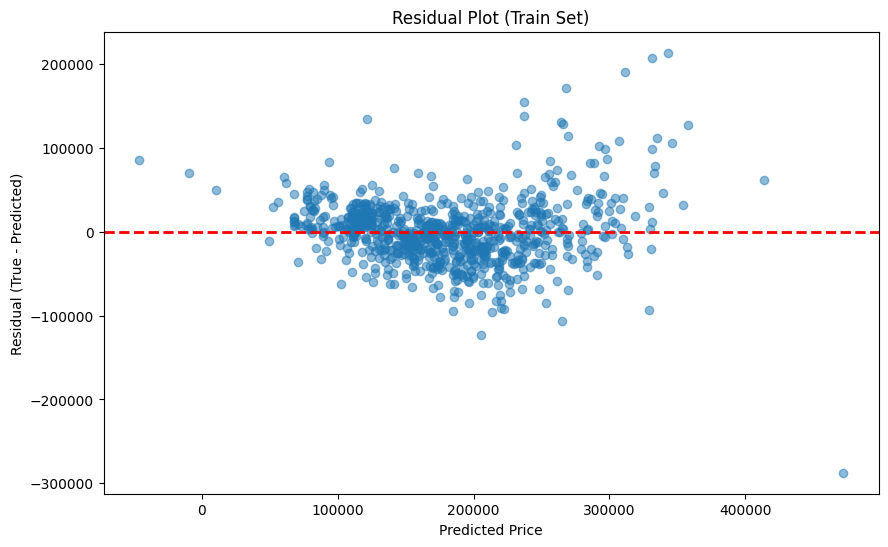

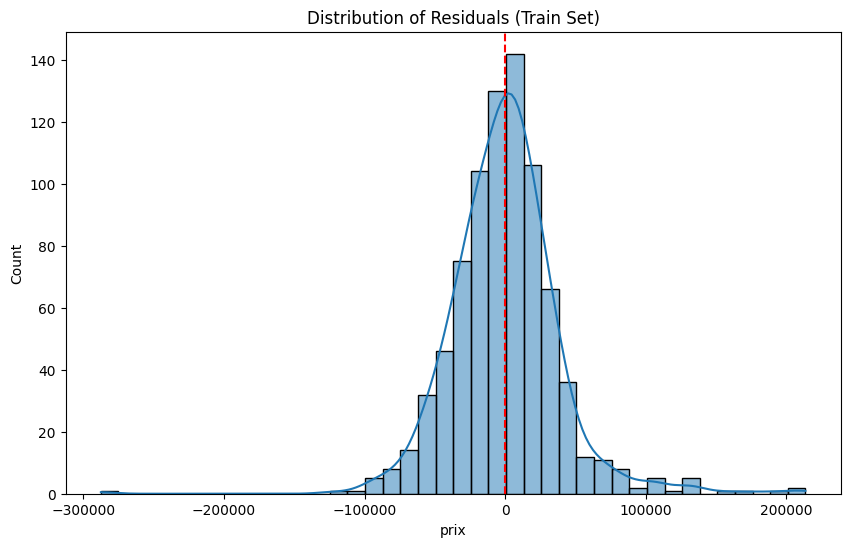

In [89]:
residuals = y_train_price - y_train_pred_price

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred_price, residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Price")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residual Plot (Train Set)")
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=40, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Residuals (Train Set)")
plt.show()

In [90]:
X_val = val_df[selected_features]
y_val = val_df["prix"]

In [91]:
y_val_pred = linear_regression.predict(X_val)

In [92]:
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation MSE (price):", mse_val)
print("Validation RMSE (price):", rmse_val)
print("Validation MAE (price):", mae_val)
print("Validation R^2 (price):", r2_val)

Validation MSE (price): 2196191155.8476834
Validation RMSE (price): 46863.53759425
Validation MAE (price): 29636.051549241223
Validation R^2 (price): 0.6710145798740705


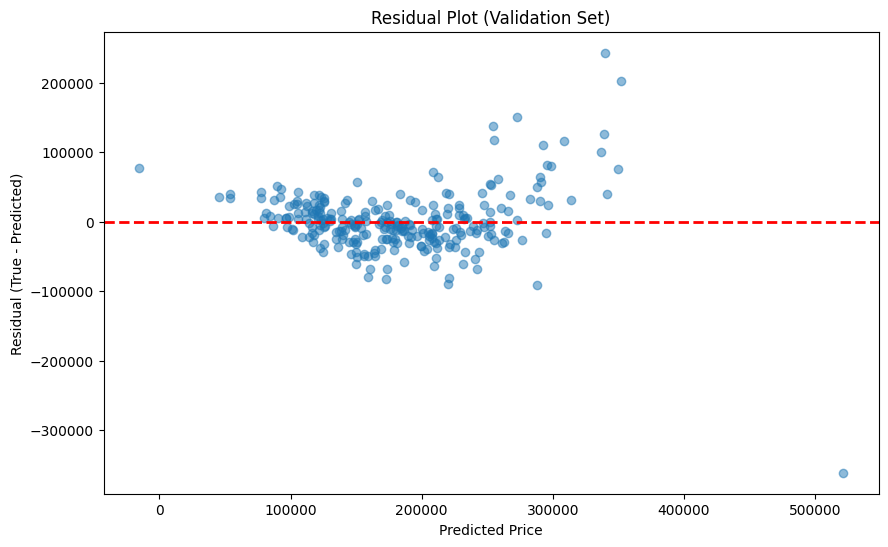

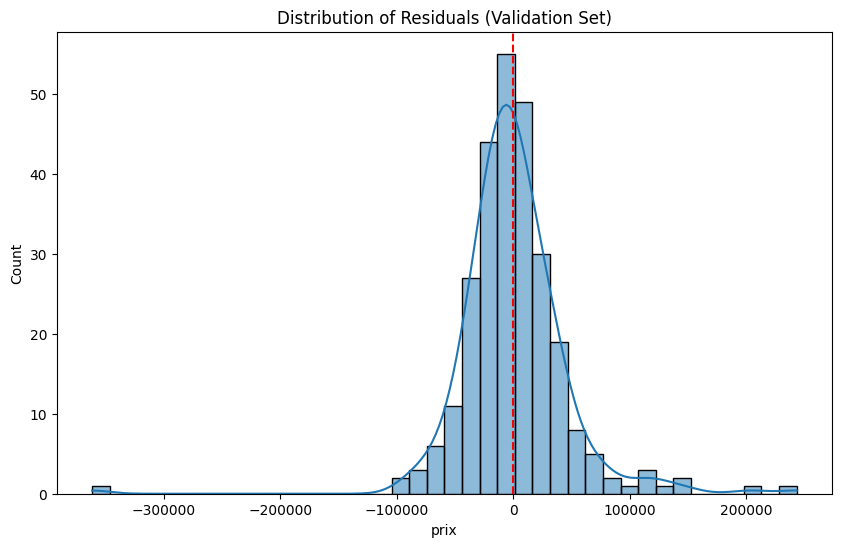

In [93]:
residuals_val = y_val - y_val_pred

# Residual plot
plt.figure(figsize=(10,6))
plt.scatter(y_val_pred, residuals_val, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Price")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residual Plot (Validation Set)")
plt.show()

# Residual distribution
plt.figure(figsize=(10,6))
sns.histplot(residuals_val, bins=40, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Residuals (Validation Set)")
plt.show()


In [80]:
X_test = test_df[selected_features]
y_test = test_df["prix"]

In [81]:
# Predict on test set
y_test_pred = linear_regression.predict(X_test)

In [82]:
# Compute metrics on test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test MSE (price):", mse_test)
print("Test RMSE (price):", rmse_test)
print("Test MAE (price):", mae_test)
print("Test R^2 (price):", r2_test)

Test MSE (price): 1942865659.454448
Test RMSE (price): 44077.949810017795
Test MAE (price): 29611.76220103301
Test R^2 (price): 0.7943625707981607


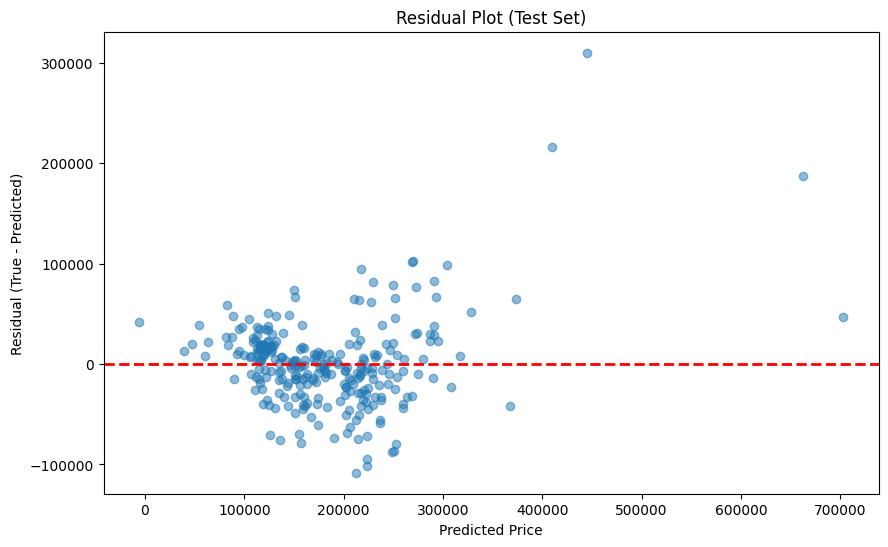

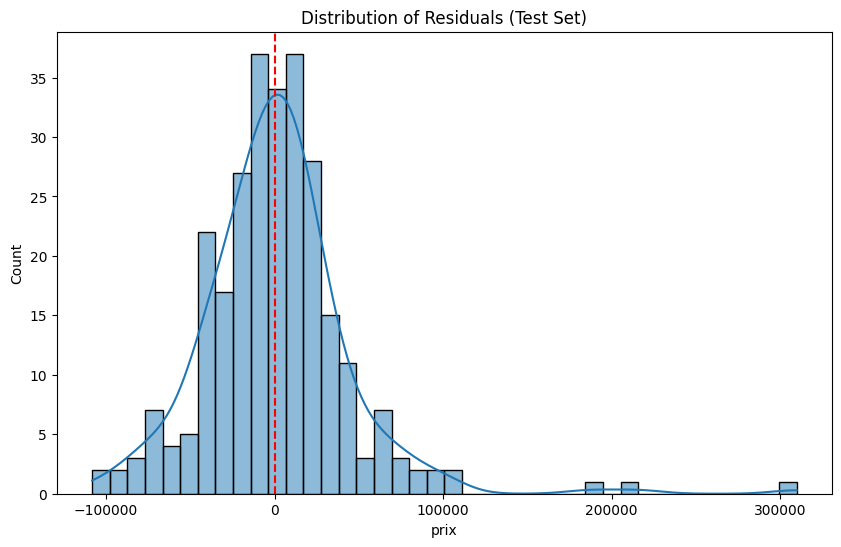

In [83]:
# Residuals for test set
residuals_test = y_test - y_test_pred

# Residual plot
plt.figure(figsize=(10,6))
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Price")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.show()

# Residual distribution
plt.figure(figsize=(10,6))
sns.histplot(residuals_test, bins=40, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Residuals (Test Set)")
plt.show()